<a href="https://colab.research.google.com/github/Saiteja4555/Assignments/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Try providing the full file path if the file is not in the current directory
file_path = "/content/Reviews.csv"
df = pd.read_csv(file_path, nrows=500)

df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [10]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [11]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [ ]:
# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]',' ')
# Removal of stop words
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# Spelling correction
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word (word).lemmatize() for word
in x.split()]))
df.Text.head()

In [ ]:
pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   -------------------------------------- 624.3/624.3 kB 892.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bknai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bknai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['Text'] = df['Text'].str.replace(r'[^\w\s]', ' ', regex=True)


In [ ]:
pip install pyspellchecker


   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.1 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.1 MB 1.3 MB/s eta 0:00:05
   ------- -------------------------------- 1.3/7.1 MB 1.9 MB/s eta 0:00:04
   ---------- ----------------------------- 1.8/7.1 MB 2.2 MB/s eta 0:00:03
   ---------- ----------------------------- 1.8/7.1 MB 2.2 MB/s eta 0:00:03
   -------------- ------------------------- 2.6/7.1 MB 2.0 MB/s eta 0:00:03
   ---------------- ----------------------- 2.9/7.1 MB 2.1 MB/s eta 0:00:03
   ----------------- ---------------------- 3.1/7.1 MB 1.8 MB/s eta 0:00:03
   ------------------- -------------------- 3.4/7.1 MB 1.8 MB/s eta 0:00:03
   ---------------------- ----------------- 3.9/7.1 MB 1.8 MB/s eta 0:00:02
   ----------------------- ------

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
df['Text'] = df['Text'].apply(lambda x: " ".join(spell.correction(word) or word for word in x.split()))


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob, Word

# Ensure required downloads
nltk.download('stopwords')
nltk.download('wordnet')

# Sample dataframe
df = pd.DataFrame({'Text': ["This is a sampl text with errrs and stopwords."]})

# Lowercasing
df['Text'] = df['Text'].str.lower()

# Removing punctuations
df['Text'] = df['Text'].str.replace(r'[^\w\s]', ' ', regex=True)

# Removing stopwords
stop = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))

# Spelling correction
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

# Output
print(df['Text'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bknai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bknai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    sample text error stopford
Name: Text, dtype: object


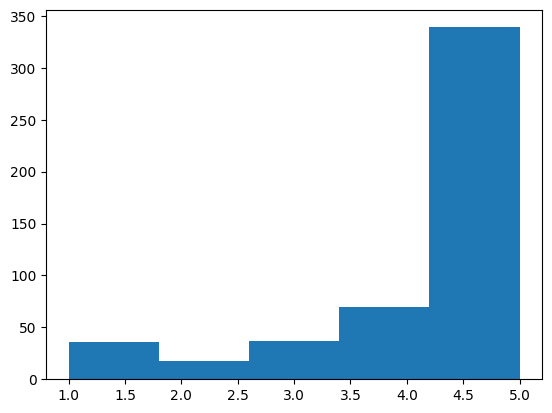

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [18]:
reviews = df

reviews.dropna(inplace=True)

reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [19]:
# To make it balanced data, we sampled each score by the lowest n-count from above. (i.e. 29743 reviews scored as '2')
score_1 = reviews [reviews['Score'] == 1].sample( n = 18 )
score_2 = reviews [reviews['Score'] == 2].sample( n = 18 )
score_3 = reviews [reviews['Score'] == 3].sample( n = 18 )
score_4 = reviews [reviews['Score'] == 4].sample( n = 18 )
score_5 = reviews [reviews['Score'] == 5].sample( n = 18 )

reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5], axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


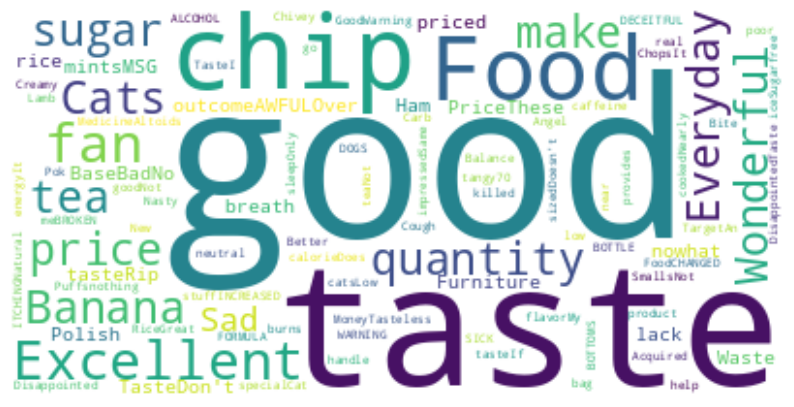

In [20]:
from wordcloud import WordCloud
#reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud (background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

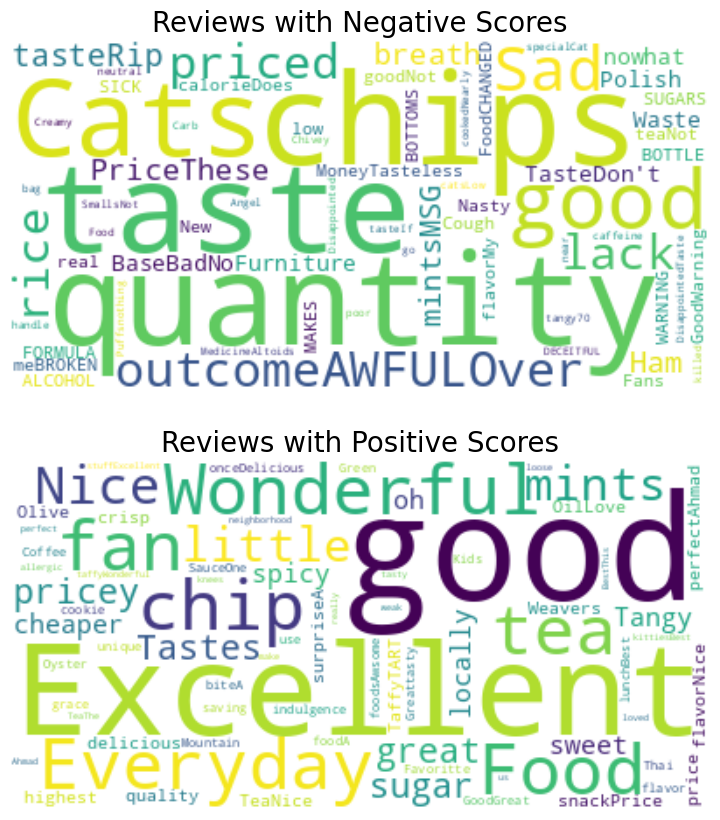

In [22]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores', fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores', fontsize=20)
plt.show()

In [23]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [24]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')

cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()

emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [25]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Download necessary NLTK resources
nltk.download('punkt')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters using regex
    text = re.sub(r'[^a-z0-9\s]', '', text)

    return text

# Example text input
text = "Hello, World! Welcome to NLP 101."

# Process the text
cleaned_text = clean_text(text)
print("Cleaned Text:", cleaned_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cleaned Text: hello world welcome to nlp 101
